<a href="https://colab.research.google.com/github/joaoalbert/Liver_Disease_Classification/blob/main/liver_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# =======================
# Data Preparation
# =======================


# Extracting data
hepatitis_data = pd.read_csv("HepatitisCdata.csv")

print(hepatitis_data.head)

# Hepatitis_data

# Identifying classes
# 0: blood_donor; 1: suspected blood_donor; 2: hepatitis; 3: fibrosis; 4: cirrshosis
patient_category = hepatitis_data["Category"]
categories_idxs = {}
categories_idxs[patient_category[0].split("=")[1]] = [0]
for i,category in enumerate(patient_category):
    category = category.split("=")[1]
    try: #while there is a next
        next_category = patient_category[i+1].split("=")[1]
    except: #when there is no next, it is the last data point
        categories_idxs[category].append(i)
    if category!=next_category:
        categories_idxs[category].append(i)
        categories_idxs[next_category] = [i+1]

print("Found categories (classes):")
categories_sizes = {}
for category in categories_idxs:
    categories_sizes[category] = categories_idxs[category][1]-categories_idxs[category][0]
    print("{}: {}".format(category, categories_sizes[category]))
print()

# Features:
features = ["ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]
features = dict(zip(range(len(features)), features))

# Cleaning Data (Excluding Nans)
print("Number of total data points:",len(hepatitis_data))
hepatitis_data = hepatitis_data.dropna()
print("Number of valid data points:",len(hepatitis_data))



<bound method NDFrame.head of      Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0    NaN   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0    NaN  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  

# Functions

In [2]:
def binary_confusion_matrix(y_real, y_pred, norm=False):
    '''
    NOT USED!
    This functions calculates the number of False and True positives and
    False and True negatives.
    Returns: true_pos, true_neg, false_pos, false_neg
    '''
    find_true  = y_real+y_pred # True pos = 2, True neg = 0, False = 1
    find_false = y_real-y_pred # False pos = -1, False neg = 1, True = 0

    true_pos = (find_true==2).sum()
    true_neg = (find_true==0).sum()
    false_pos = (find_false==-1).sum()
    false_neg = (find_false==1).sum()
    confusion_matrix = np.array([[true_pos, false_neg], [false_pos, true_neg]])
    if norm:
        N = np.sum(confusion_matrix)
        return confusion_matrix/N
    else:
        return confusion_matrix

def accuracy(y_real, y_pred):
    '''
    NOT USED!
    This functions calculates the accuracy from the number of points misclassified.
    '''
    [[true_pos, false_neg], [false_pos, true_neg]] = binary_confusion_matrix(y_real, y_pred)
    true_predict = true_pos + true_neg
    false_predict = false_pos + false_neg
    acc = true_predict/len(y_real)
    return acc, false_predict

def precision_recall(y_real, y_pred):
    '''
    NOT USED!
    This functions calculates the precision and the recall for the predicted data.
    Returns: precision, recall
    
    Precision = no. true positives / no. real true points
    Recall = no. true positives / no. predicted true points
    predicted = true + false positives
    '''
    [[true_pos, false_neg], [false_pos, true_neg]] = binary_confusion_matrix(y_real, y_pred)
    real_pos = y_real.sum()
    recall = true_pos/(true_pos+false_pos) if (true_pos+false_pos)!=0 else 1
    prec = true_pos/real_pos if real_pos!=0 else 1
    #print("Real positives: ",real_pos)
    #print("true_pos, true_neg, false_pos, false_neg: ", true_pos, true_neg, false_pos, false_neg)
    return prec, recall

def metrics(y_real, y_pred, print_results=True):
    '''
    This function calculates the accuracy, precision, recall and confusion matrix metrics.
    '''
    from sklearn.metrics import recall_score, precision_score, accuracy_score, balanced_accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
    
    y_class = np.where(y_pred>0.5, 1, 0)
    #print(y_real)
    #print(y_pred)
    #print(y_class)

    confusion_matrix = confusion_matrix(y_real, y_class)
    acc = accuracy_score(y_real, y_class)
    bal_acc = balanced_accuracy_score(y_real, y_class)
    prec = precision_score(y_real, y_class)
    rec = recall_score(y_real, y_class)
    roc = roc_curve(y_real, y_pred)
    roc_auc = roc_auc_score(y_real, y_pred)
    prec_rec_curve = precision_recall_curve(y_real, y_pred)
    
    if print_results:
        print("Confusion matrix:")
        print(confusion_matrix)
        print("Accuracy: {:.02f}%".format(100*acc))
        print("Balanced accuracy: {:.02f}%".format(100*bal_acc))
        print("Precision: {:.02f}%".format(100*prec))
        print("Recall: {:.02f}%".format(100*rec))
        print("ROC AUC: {:.02f}%".format(100*roc_auc))
    return confusion_matrix, acc, bal_acc, prec, rec, roc, roc_auc, prec_rec_curve


def vectorize_and_partition(pd_dataset, feature_idxs, category, train_fraction, seed=12345):
    # Vectorizing data
    X = pd_dataset.to_numpy()[:,feature_idxs]
    N = len(X)
    y = np.zeros(len(X))
    y[categories_idxs[category][0]:categories_idxs[category][1]] = 1 # 0: False; 1: True
    print("Number of class members: {}/{}".format(categories_sizes[category],N))

    # This function ensures test and train sets have the same proportion of postives and negatives
    from sklearn.model_selection import StratifiedShuffleSplit
    stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=1-train_fraction, random_state=seed)
    #print(*stratSplit.split(X, y),)
    for train_idx, test_idx in stratSplit.split(X, y):
        #print("Fraction for training partition: {}%".format(int(train_fraction*100)))
        training_X = X[train_idx]
        training_y = y[train_idx]
        testing_X = X[test_idx]
        testing_y = y[test_idx]
    
    return training_X, training_y, testing_X, testing_y


def multiclass_vectorize_and_partition(pd_dataset, feature_idxs, category, train_fraction, seed=12345):
    '''
    NOT USED!
    '''
    # Vectorizing data
    X = pd_dataset.to_numpy()[:,feature_idxs]
    N = len(X)

    # Applying one-hot encoding
    from sklearn.preprocessing import OneHotEncoder
    enc = OneHotEncoder()
    onehotfit = enc.fit(pd_dataset["Category"].to_numpy().reshape(N,1))
    categories = enc.categories_
    y = onehotfit.transform(pd_dataset["Category"].to_numpy().reshape(N,1)).toarray()

    # Shuffling data before partitioning
    np.random.seed(seed)
    shuffle_idxs = np.arange(N)
    np.random.shuffle(shuffle_idxs)
    X = X[shuffle_idxs]
    y = y[shuffle_idxs]

    # Training/Testing data partitioning
    N_train = int(N*train_fraction)
    #print("Fraction for training partition: {}%".format(int(train_fraction*100)))
    training_X = X[0:N_train]
    training_y = y[0:N_train]
    testing_X = X[N_train:]
    testing_y = y[N_train:]
    
    return training_X, training_y, testing_X, testing_y

# Baseline

In [3]:
# =======================
# BASELINE SOLUTION
# =======================

# The chosen baseline solution is simply classifying all of the points as the
# most frequent class. 

# Vectorizing data
X = hepatitis_data.to_numpy()
N = len(X)
N_classes = len(categories_idxs)

# Identifying most frequent class
most_freq_category = max(categories_sizes, key=categories_sizes.get)

y = np.zeros(len(X))
y[categories_idxs[most_freq_category][0]:categories_idxs[most_freq_category][1]] = 1 # 0: False; 1: True
print("Number of data points positive:", categories_sizes[most_freq_category])

baseline_y = np.ones(y.shape)
*metrics_i, = metrics(y, baseline_y)

Number of data points positive: 532
Confusion matrix:
[[  0  57]
 [  0 532]]
Accuracy: 90.32%
Balanced accuracy: 50.00%
Precision: 90.32%
Recall: 100.00%
ROC AUC: 50.00%


In [4]:
# Gathering Metrics for Each Method

methods_metrics = {}
methods_metrics["Baseline"] = metrics_i

# ONE VS ALL

# Binary Logistic Regression

In [5]:
# =======================
# BINARY CLASSIFICATION
# =======================

# Here, I set one class among the others as the target.
# I use the SAGA solver (from sklearn) and no regularization, just to 
# investigate the general basic behavior of the learning algorithm for this
# particular dataset.

method = "Simple Logistic"
#binary_logistic_metrics = {}

LinearRegressionArgs = {"solver" : "saga",
                        "penalty" : "none", # no regularization
                        "max_iter" : 10000, # default: 100
                        "tol": 1e-4,        # default: 1e-4
                        "class_weight": None} # no class imbalancement treatment

# Training Partition Fraction
train_fraction = 0.7

# Selecting features
# ID Class Age Sex ALB ALP ALT AST BIL CHE CHOL CREA GGT PROT
feature_idxs = list(range(4,14)) #[4, 8, 10, 13]

for category in categories_idxs:

    print("\n\n===================================")
    print("Training for class '{}'".format(category))
    training_X, training_y, testing_X, testing_y = vectorize_and_partition(hepatitis_data, feature_idxs,category,train_fraction)

    # Training
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(**LinearRegressionArgs)
    model = logreg.fit(training_X, training_y)
    y_pred = logreg.predict_proba(training_X)[:,1]
    print("\n * In-sample statistics (E_in):")
    metrics(training_y, y_pred)

    # Testing
    y_pred_test = logreg.predict_proba(testing_X)[:,1]
    print("\n * Testing statistics (E_out):")
    *metrics_i, = metrics(testing_y, y_pred_test)
    methods_metrics[method + " " + category] = metrics_i
    #binary_logistic_metrics[category] = metrics_i

#methods_metrics["binary_logistic"] = binary_logistic_metrics



Training for class 'Blood Donor'
Number of class members: 532/589

 * In-sample statistics (E_in):
Confusion matrix:
[[ 31   9]
 [  3 369]]
Accuracy: 97.09%
Balanced accuracy: 88.35%
Precision: 97.62%
Recall: 99.19%
ROC AUC: 98.19%

 * Testing statistics (E_out):
Confusion matrix:
[[ 14   3]
 [  2 158]]
Accuracy: 97.18%
Balanced accuracy: 90.55%
Precision: 98.14%
Recall: 98.75%
ROC AUC: 94.71%


Training for class 'suspect Blood Donor'
Number of class members: 6/589

 * In-sample statistics (E_in):
Confusion matrix:
[[407   1]
 [  2   2]]
Accuracy: 99.27%
Balanced accuracy: 74.88%
Precision: 66.67%
Recall: 50.00%
ROC AUC: 99.88%

 * Testing statistics (E_out):
Confusion matrix:
[[174   1]
 [  2   0]]
Accuracy: 98.31%
Balanced accuracy: 49.71%
Precision: 0.00%
Recall: 0.00%
ROC AUC: 95.14%


Training for class 'Hepatitis'
Number of class members: 23/589

 * In-sample statistics (E_in):
Confusion matrix:
[[391   5]
 [  7   9]]
Accuracy: 97.09%
Balanced accuracy: 77.49%
Precision: 64.29

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Binary w/ CV

In [13]:
# =======================
# BINARY CLASSIFICATION & CV
# =======================

# Here, I set one class among the others as the target.
# I also use weight decay regularization and cross-validation. 


method = "CV Logistic"
#CV_logistic_metrics = {}

LinearRegressionCVArgs = {"cv": 5, 
                          "random_state":0,
                          "solver" : "saga",
                          "penalty" : "l2", # weight decay regularization
                          "max_iter" : 10000, # default: 100
                          "tol": 1e-4,        # default: 1e-4
                          "class_weight": None}

# Training Partition Fraction
train_fraction = 0.7

# Selecting features
# ID Class Age Sex ALB ALP ALT AST BIL CHE CHOL CREA GGT PROT
feature_idxs = list(range(4,14)) #[4, 8, 10, 13]

for category in categories_idxs:

    print("\n\nTraining for class '{}'".format(category))
    training_X, training_y, testing_X, testing_y = vectorize_and_partition(hepatitis_data, feature_idxs,category,train_fraction)

    # Training

    from sklearn.linear_model import LogisticRegressionCV
    logreg = LogisticRegressionCV( **LinearRegressionCVArgs)
    logreg.fit(training_X, training_y)
    y_pred = logreg.predict_proba(training_X)[:,1]
    print("\nIn-sample statistics (E_in):")
    metrics(training_y, y_pred)

    # Testing
    y_pred_test = logreg.predict_proba(testing_X)[:,1]
    print("\nTesting statistics (E_out):")
    *metrics_i, = metrics(testing_y, y_pred_test)
    methods_metrics[method + " " + category] = metrics_i




Training for class 'Blood Donor'
Number of class members: 532/589

In-sample statistics (E_in):
Confusion matrix:
[[ 31   9]
 [  3 369]]
Accuracy: 97.09%
Balanced accuracy: 88.35%
Precision: 97.62%
Recall: 99.19%
ROC AUC: 98.19%

Testing statistics (E_out):
Confusion matrix:
[[ 14   3]
 [  2 158]]
Accuracy: 97.18%
Balanced accuracy: 90.55%
Precision: 98.14%
Recall: 98.75%
ROC AUC: 92.54%


Training for class 'suspect Blood Donor'
Number of class members: 6/589


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,



In-sample statistics (E_in):
Confusion matrix:
[[408   0]
 [  4   0]]
Accuracy: 99.03%
Balanced accuracy: 50.00%
Precision: 0.00%
Recall: 0.00%
ROC AUC: 98.59%

Testing statistics (E_out):
Confusion matrix:
[[175   0]
 [  2   0]]
Accuracy: 98.87%
Balanced accuracy: 50.00%
Precision: 0.00%
Recall: 0.00%
ROC AUC: 93.14%


Training for class 'Hepatitis'
Number of class members: 23/589


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



In-sample statistics (E_in):
Confusion matrix:
[[391   5]
 [  7   9]]
Accuracy: 97.09%
Balanced accuracy: 77.49%
Precision: 64.29%
Recall: 56.25%
ROC AUC: 98.67%

Testing statistics (E_out):
Confusion matrix:
[[169   1]
 [  4   3]]
Accuracy: 97.18%
Balanced accuracy: 71.13%
Precision: 75.00%
Recall: 42.86%
ROC AUC: 99.08%


Training for class 'Fibrosis'
Number of class members: 20/589

In-sample statistics (E_in):
Confusion matrix:
[[395   3]
 [  2  12]]
Accuracy: 98.79%
Balanced accuracy: 92.48%
Precision: 80.00%
Recall: 85.71%
ROC AUC: 99.71%

Testing statistics (E_out):
Confusion matrix:
[[170   1]
 [  2   4]]
Accuracy: 98.31%
Balanced accuracy: 83.04%
Precision: 80.00%
Recall: 66.67%
ROC AUC: 99.32%


Training for class 'Cirrhosis'
Number of class members: 29/589


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,



In-sample statistics (E_in):
Confusion matrix:
[[409   0]
 [  3   0]]
Accuracy: 99.27%
Balanced accuracy: 50.00%
Precision: 0.00%
Recall: 0.00%
ROC AUC: 93.56%

Testing statistics (E_out):
Confusion matrix:
[[176   0]
 [  1   0]]
Accuracy: 99.44%
Balanced accuracy: 50.00%
Precision: 0.00%
Recall: 0.00%
ROC AUC: 94.89%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression w/ Cost Sensitive Learning

In [7]:
# =======================
# BINARY CLASSIFICATION & CSL
# =======================

# Here, I set one class among the others as the target.
# I also apply Cost Sensitive Learning through the use of class weights to
# deal with class imbalancement.
# Each weight equals to the fraction of the class among all data points.


method = "CSL Logistic"
CSL_logistic_metrics = {}

LinearRegressionCVArgs = {"solver" : "saga",
                          "penalty" : "none", # no regularization
                          "max_iter" : 10000, # default: 100
                          "tol": 1e-4,        # default: 1e-4
                          "class_weight": "balanced"}

# Training Partition Fraction
train_fraction = 0.7

# Selecting features
# ID Class Age Sex ALB ALP ALT AST BIL CHE CHOL CREA GGT PROT
feature_idxs = list(range(4,14)) #[4, 8, 10, 13]

for category in categories_idxs:

    print("\n\nTraining for class '{}'".format(category))
    training_X, training_y, testing_X, testing_y = vectorize_and_partition(hepatitis_data, feature_idxs,category,train_fraction)

    # Training

    from sklearn.linear_model import LogisticRegressionCV
    logreg = LogisticRegression( **LinearRegressionCVArgs)
    logreg.fit(training_X, training_y)
    y_pred = logreg.predict_proba(training_X)[:,1]
    print("\nIn-sample statistics (E_in):")
    metrics(training_y, y_pred)

    # Testing
    y_pred_test = logreg.predict_proba(testing_X)[:,1]
    print("\nTesting statistics (E_out):")
    *metrics_i, = metrics(testing_y, y_pred_test)
    methods_metrics[method + " " + category] = metrics_i
    #CSL_logistic_metrics[category] = metrics_i

#methods_metrics["binary_logistic"] = CSL_logistic_metrics




Training for class 'Blood Donor'
Number of class members: 532/589


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,



In-sample statistics (E_in):
Confusion matrix:
[[ 38   2]
 [  9 363]]
Accuracy: 97.33%
Balanced accuracy: 96.29%
Precision: 99.45%
Recall: 97.58%
ROC AUC: 98.60%

Testing statistics (E_out):
Confusion matrix:
[[ 16   1]
 [  7 153]]
Accuracy: 95.48%
Balanced accuracy: 94.87%
Precision: 99.35%
Recall: 95.62%
ROC AUC: 98.64%


Training for class 'suspect Blood Donor'
Number of class members: 6/589

In-sample statistics (E_in):
Confusion matrix:
[[402   6]
 [  0   4]]
Accuracy: 98.54%
Balanced accuracy: 99.26%
Precision: 40.00%
Recall: 100.00%
ROC AUC: 99.82%

Testing statistics (E_out):
Confusion matrix:
[[173   2]
 [  1   1]]
Accuracy: 98.31%
Balanced accuracy: 74.43%
Precision: 33.33%
Recall: 50.00%
ROC AUC: 94.00%


Training for class 'Hepatitis'
Number of class members: 23/589

In-sample statistics (E_in):
Confusion matrix:
[[376  20]
 [  0  16]]
Accuracy: 95.15%
Balanced accuracy: 97.47%
Precision: 44.44%
Recall: 100.00%
ROC AUC: 98.85%

Testing statistics (E_out):
Confusion matrix:

# Logistic Regression w/ SMOTE

In [8]:
# ==============================================
# BINARY CLASSIFICATION w/ SMOTE Oversampling
# ==============================================

# Here, I use the SMOTE algorithm to generate oversampling and thus have 
# and equal representation of all classes.

method = "SMOTE Logistic"

LinearRegressionArgs = {"solver" : "saga",
                        "penalty" : "none", # no regularization
                        "max_iter" : 10000, # default: 100
                        "tol": 1e-4,        # default: 1e-4
                        "class_weight": None} # no class imbalancement treatment

# Training Partition Fraction
train_fraction = 0.7
seed = 12345

# Selecting features
# ID Class Age Sex ALB ALP ALT AST BIL CHE CHOL CREA GGT PROT
feature_idxs = list(range(4,14)) #[4, 8, 10, 13]


# Vectorizing data
X_ordered = hepatitis_data.to_numpy()[:,feature_idxs]
N = len(X_ordered)

# Applying one-hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
onehotfit = enc.fit(hepatitis_data["Category"].to_numpy().reshape(N,1))
categories = enc.categories_
y_ohc = onehotfit.transform(hepatitis_data["Category"].to_numpy().reshape(N,1)).toarray()

print("Applying SMOTE oversampling...")
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=seed, k_neighbors=4)
X_ordered, y_ohc = sm.fit_resample(X_ordered, y_ohc)
N = len(X)

for i, category in enumerate(categories_idxs):

    print("\n\n===================================")
    print("Training for class '{}'".format(category))

    # Turning back to binary from one-hot-encoding
    y = np.zeros(len(y_ohc))
    y[y_ohc[:,i]==1] = 1

    category_size = np.sum(y==1)
    print("Number of class members: {}/{}".format(category_size,N))

    # Shuffling data before partitioning
    np.random.seed(seed)
    shuffle_idxs = np.arange(N)
    np.random.shuffle(shuffle_idxs)
    X = X_ordered[shuffle_idxs]
    y = y[shuffle_idxs]

    # Training/Testing data partitioning
    N_train = int(N*train_fraction)
    #print("Fraction for training partition: {}%".format(int(train_fraction*100)))
    training_X = X[0:N_train]
    training_y = y[0:N_train]
    testing_X = X[N_train:]
    testing_y = y[N_train:]

    # Training
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(**LinearRegressionArgs)
    model = logreg.fit(training_X, training_y)
    y_pred = logreg.predict_proba(training_X)[:,1]
    print("\n * In-sample statistics (E_in):")
    metrics(training_y, y_pred)

    # Testing
    y_pred_test = logreg.predict_proba(testing_X)[:,1]
    print("\n * Testing statistics (E_out):")
    *metrics_i, = metrics(testing_y, y_pred_test)
    methods_metrics[method + " " + category] = metrics_i

Applying SMOTE oversampling...


Training for class 'Blood Donor'
Number of class members: 526/589

 * In-sample statistics (E_in):
Confusion matrix:
[[ 40   7]
 [  1 364]]
Accuracy: 98.06%
Balanced accuracy: 92.42%
Precision: 98.11%
Recall: 99.73%
ROC AUC: 97.58%

 * Testing statistics (E_out):
Confusion matrix:
[[ 13   3]
 [  1 160]]
Accuracy: 97.74%
Balanced accuracy: 90.31%
Precision: 98.16%
Recall: 99.38%
ROC AUC: 98.06%


Training for class 'suspect Blood Donor'
Number of class members: 526/589

 * In-sample statistics (E_in):
Confusion matrix:
[[406   0]
 [  4   2]]
Accuracy: 99.03%
Balanced accuracy: 66.67%
Precision: 100.00%
Recall: 33.33%
ROC AUC: 99.38%

 * Testing statistics (E_out):
Confusion matrix:
[[176   0]
 [  0   1]]
Accuracy: 100.00%
Balanced accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
ROC AUC: 100.00%


Training for class 'Hepatitis'
Number of class members: 526/589

 * In-sample statistics (E_in):
Confusion matrix:
[[399   3]
 [  9   1]]
Accuracy: 97.09%


# Binary Logistic Regression w/ Feature Removal

In [9]:
# =======================
# BINARY CLASSIFICATION w/ FEATURE REMOVAL
# =======================

# Here, I use Recursive Feature Elimination to have an estimate of feature importance.


method = "RFE Logistic"

LinearRegressionArgs = {"solver" : "saga",
                        "penalty" : "none", # no regularization
                        "max_iter" : 10000, # default: 100
                        "tol": 1e-4,        # default: 1e-4
                        "class_weight": None} # no class imbalancement treatment

# Training Partition Fraction
train_fraction = 0.7

# Selecting features
# ID Class Age Sex ALB ALP ALT AST BIL CHE CHOL CREA GGT PROT
feature_idxs = list(range(4,14)) #[4, 8, 10, 13]

important_features = []

for category in categories_idxs:

    print("\n\n===================================")
    print("Training for class '{}'".format(category))
    training_X, training_y, testing_X, testing_y = vectorize_and_partition(hepatitis_data, feature_idxs,category,train_fraction)

    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(**LinearRegressionArgs)

    # Feature Removal
    from sklearn.feature_selection import RFE
    feature_remover = RFE(estimator=logreg, n_features_to_select=4, step=1)
    rfe = feature_remover.fit(training_X, training_y)
    important_features.append(feature_remover.get_support(indices=True))
    print("Most relevant features:",important_features[-1])

    # Training
    model = logreg.fit(training_X, training_y)
    y_pred = rfe.predict_proba(training_X)[:,1]
    print("\n * In-sample statistics (E_in):")
    metrics(training_y, y_pred)

    # Testing
    y_pred_test = logreg.predict_proba(testing_X)[:,1]
    print("\n * Testing statistics (E_out):")
    *metrics_i, = metrics(testing_y, y_pred_test)
    methods_metrics[method + " " + category] = metrics_i




Training for class 'Blood Donor'
Number of class members: 532/589
Most relevant features: [0 2 3 6]

 * In-sample statistics (E_in):
Confusion matrix:
[[ 31   9]
 [  5 367]]
Accuracy: 96.60%
Balanced accuracy: 88.08%
Precision: 97.61%
Recall: 98.66%
ROC AUC: 97.88%

 * Testing statistics (E_out):
Confusion matrix:
[[ 14   3]
 [  2 158]]
Accuracy: 97.18%
Balanced accuracy: 90.55%
Precision: 98.14%
Recall: 98.75%
ROC AUC: 94.71%


Training for class 'suspect Blood Donor'
Number of class members: 6/589
Most relevant features: [0 1 7 9]

 * In-sample statistics (E_in):
Confusion matrix:
[[408   0]
 [  4   0]]
Accuracy: 99.03%
Balanced accuracy: 50.00%
Precision: 0.00%
Recall: 0.00%
ROC AUC: 98.65%

 * Testing statistics (E_out):
Confusion matrix:
[[174   1]
 [  2   0]]
Accuracy: 98.31%
Balanced accuracy: 49.71%
Precision: 0.00%
Recall: 0.00%
ROC AUC: 95.14%


Training for class 'Hepatitis'
Number of class members: 23/589


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Most relevant features: [1 2 5 8]

 * In-sample statistics (E_in):
Confusion matrix:
[[392   4]
 [ 10   6]]
Accuracy: 96.60%
Balanced accuracy: 68.24%
Precision: 60.00%
Recall: 37.50%
ROC AUC: 97.89%

 * Testing statistics (E_out):
Confusion matrix:
[[169   1]
 [  5   2]]
Accuracy: 96.61%
Balanced accuracy: 63.99%
Precision: 66.67%
Recall: 28.57%
ROC AUC: 99.16%


Training for class 'Fibrosis'
Number of class members: 20/589
Most relevant features: [2 3 5 6]

 * In-sample statistics (E_in):
Confusion matrix:
[[394   4]
 [  6   8]]
Accuracy: 97.57%
Balanced accuracy: 78.07%
Precision: 66.67%
Recall: 57.14%
ROC AUC: 99.19%

 * Testing statistics (E_out):
Confusion matrix:
[[170   1]
 [  2   4]]
Accuracy: 98.31%
Balanced accuracy: 83.04%
Precision: 80.00%
Recall: 66.67%
ROC AUC: 99.42%


Training for class 'Cirrhosis'
Number of class members: 29/589
Most relevant features: [0 2 3 5]

 * In-sample statistics (E_in):
Confusion matrix:
[[408   1]
 [  3   0]]
Accuracy: 99.03%
Balanced accurac

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


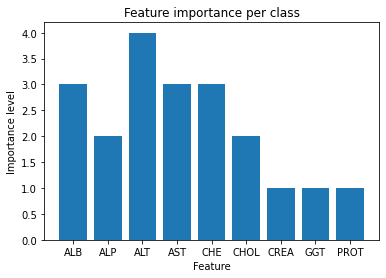

In [10]:
# Plotting feature counts

unique, counts = np.unique(np.array(important_features), return_counts=True)
x = np.arange(len(unique))
plt.figure(0)
plt.title("Feature importance per class")
plt.bar(x, counts)
plt.xlabel("Feature")
plt.ylabel("Importance level")
plt.xticks(x, [features[i] for i in unique])
plt.show()
plt.close()

# Results

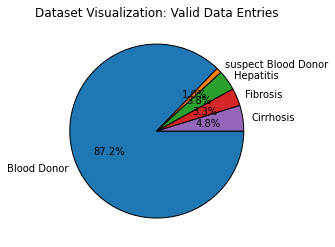

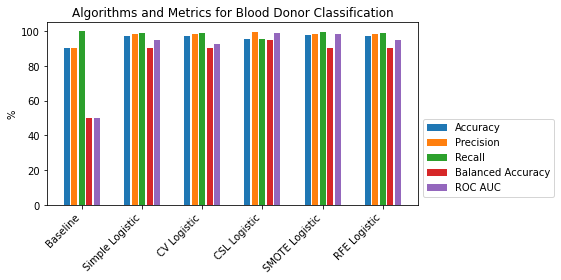

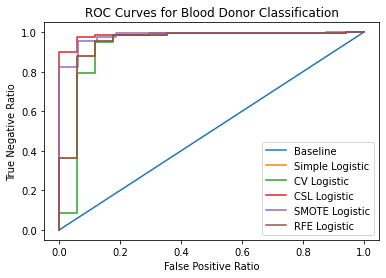

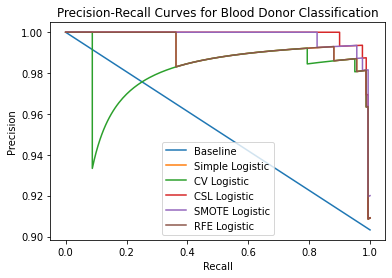

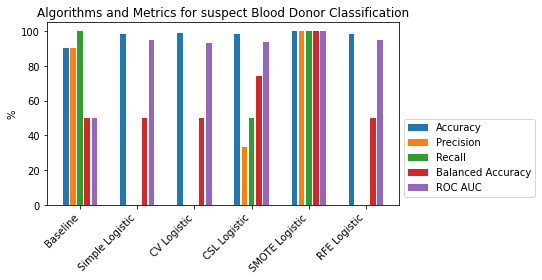

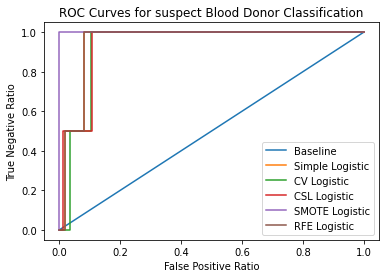

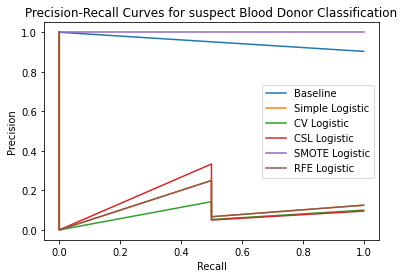

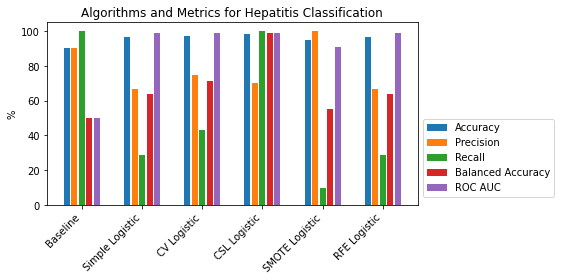

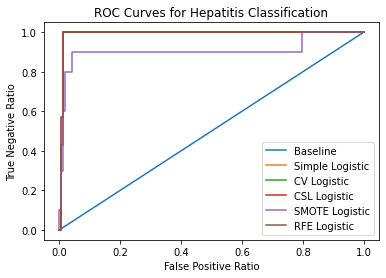

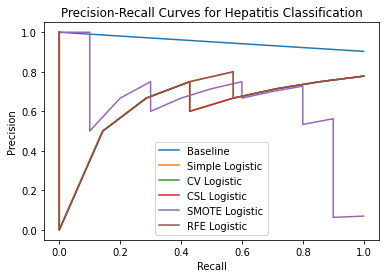

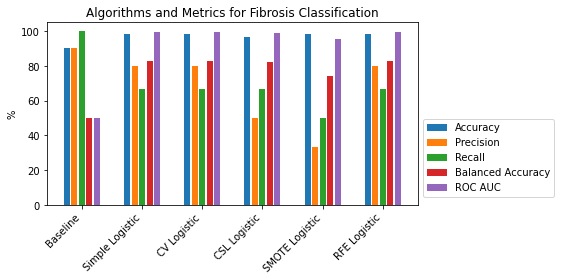

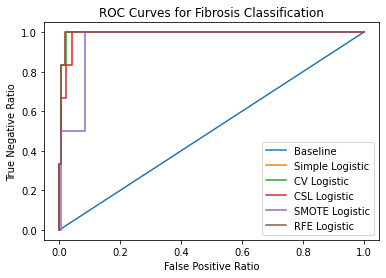

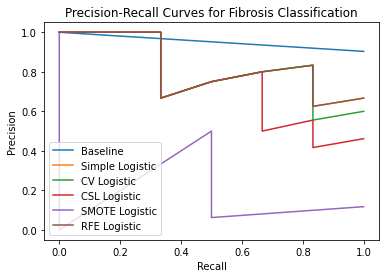

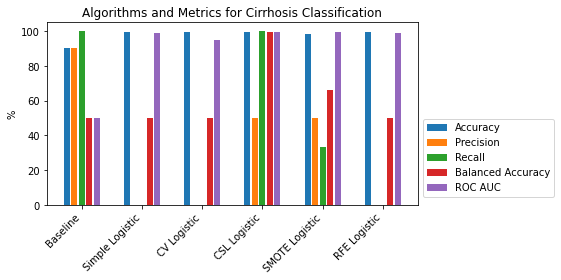

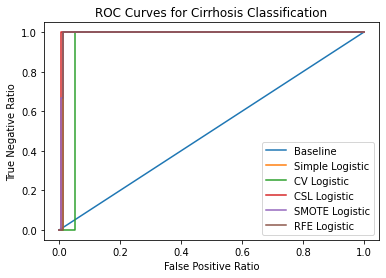

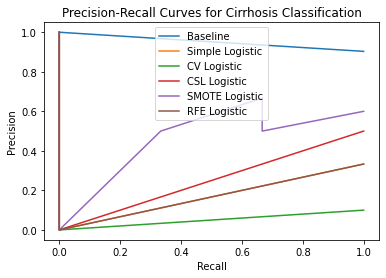

In [14]:
# We have information on different algorithms, classes and metrics.
# Here, I group the information to compare algorithms and metrics.
# I separate each category classification.
import matplotlib.pyplot as plt

# Pie Chart for Categories
plt.title("Dataset Visualization: Valid Data Entries")
wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': '-', 'antialiased': True}
plt.pie(categories_sizes.values(), labels=categories_sizes.keys(), autopct='%1.1f%%', wedgeprops=wedgeprops, counterclock=False)
plt.show()

baseline_label, *metrics_labels, = methods_metrics.keys()
baseline_data, *metrics_data, = methods_metrics.values()

# confusion_matrix, acc, bal_acc, prec, rec, roc, roc_auc
metrics_bar_labels = np.array(["Confusion Matrix", "Accuracy", "Balanced Accuracy", "Precision", "Recall", "ROC", "ROC AUC", "PR"])
metrics_idxs = [1,3,4, 2, 6]
metrics_bar_labels = metrics_bar_labels[metrics_idxs]
N_metrics = len(metrics_idxs)

# Plotting Results per Category Classification 
for i_class in range(N_classes):
    category = list(categories_idxs.keys())[i_class]

    # Collecting metrics data for each algorithm, including Baseline
    bars = [[baseline_data[i] for i in metrics_idxs]]
    bar_labels = [baseline_label]
    ROCs = [baseline_data[5]]
    PRs = [baseline_data[7]]
    for i_algorithm in range(i_class, len(metrics_labels), N_classes):
        bars.append([])
        bar_labels.append(metrics_labels[i_algorithm].replace(" "+category,""))

        # Collecting all metrics measurements
        for i_metric in metrics_idxs:
            bars[-1].append(metrics_data[i_algorithm][i_metric])
        ROCs.append(metrics_data[i_algorithm][5])
        PRs.append(metrics_data[i_algorithm][7])

    # Plotting Bar Charts with Numerical Metrics
    bars = 100*np.array(bars)
    x = np.arange(len(bar_labels))
    width = 0.50

    plt.figure(i_class)
    plt.title("Algorithms and Metrics for {} Classification".format(category))
    for i, dx in enumerate(np.linspace(-width/2,width/2,N_metrics)):
        plt.bar(x+dx, bars[:,i], label=metrics_bar_labels[i], width=width/N_metrics)#, edgecolor="black")
        #ax.bar_label(rects, padding=3)
    plt.ylabel(r"%")
    plt.xticks(x, bar_labels, rotation=45, ha="right")
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()

    # Plotting ROC Curves
    plt.figure(i_class)
    plt.title("ROC Curves for {} Classification".format(category))
    plt.xlabel("False Positive Ratio")
    plt.ylabel("True Negative Ratio")
    for i in range(len(ROCs)):
        fpr, tpr, thresholds = ROCs[i]
        plt.plot(fpr, tpr, label=bar_labels[i])
    plt.legend()
    plt.show()

    # Plotting PR Curves
    plt.figure(i_class)
    plt.title("Precision-Recall Curves for {} Classification".format(category))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    for i in range(len(ROCs)):
        pr, rc, thresholds = PRs[i]
        plt.plot(rc, pr, label=bar_labels[i])
    plt.legend()
    plt.show()

